####  **Import Required Libraries**

In [721]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

####  **Load Cleaned Data**

In [722]:
file_path = "../resources/data/output/customer_churn_cleaned.csv"   
df = pd.read_csv(file_path)

In [723]:
df.head()

,call_failure,complains,subscription_length,charge_amount,seconds_of_use,frequency_of_use,frequency_of_SMS,distinct_called_numbers,age_group,tariff_plan,status,age,customer_value,churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [724]:
df.shape

(2850, 14)

In [725]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2850 entries, 0 to 2849
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_failure             2850 non-null   int64  
 1   complains                2850 non-null   int64  
 2   subscription_length      2850 non-null   int64  
 3   charge_amount            2850 non-null   int64  
 4   seconds_of_use           2850 non-null   int64  
 5   frequency_of_use         2850 non-null   int64  
 6   frequency_of_SMS         2850 non-null   int64  
 7   distinct_called_numbers  2850 non-null   int64  
 8   age_group                2850 non-null   int64  
 9   tariff_plan              2850 non-null   int64  
 10  status                   2850 non-null   int64  
 11  age                      2850 non-null   int64  
 12  customer_value           2850 non-null   float64
 13  churn                    2850 non-null   int64  
dtypes: float64(1), int64(13)

In [726]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 call_failure               0
complains                  0
subscription_length        0
charge_amount              0
seconds_of_use             0
frequency_of_use           0
frequency_of_SMS           0
distinct_called_numbers    0
age_group                  0
tariff_plan                0
status                     0
age                        0
customer_value             0
churn                      0
dtype: int64


####  **Descriptive Statistics**

In [727]:
# Calculate descriptive statistics for numerical features.
# Exclude categorical features like 'complains', 'charge_amount', 
# 'age_group', 'tariff_plan', 'status', and 'churn'
descriptive_stats = df.drop(
    columns=['complains', 'charge_amount', 'age_group', 'tariff_plan', 'status', 'churn']
).describe()

descriptive_stats

,call_failure,subscription_length,seconds_of_use,frequency_of_use,frequency_of_SMS,distinct_called_numbers,age,customer_value
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,7.802456,32.452982,4534.243158,70.484912,73.789825,23.870526,31.077193,474.990367
std,7.326172,8.723075,4199.712303,57.401512,112.062397,17.193929,8.861934,514.442198
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000
25%,1.000000,29.000000,1458.750000,28.000000,7.000000,11.000000,25.000000,117.527500
50%,6.000000,35.000000,3041.000000,54.500000,22.000000,21.000000,30.000000,232.520000
75%,12.000000,38.000000,6500.000000,96.000000,88.000000,34.000000,30.000000,790.080000
max,36.000000,47.000000,17090.000000,255.000000,522.000000,97.000000,55.000000,2165.280000


#### **Distribution of Numerical Features**

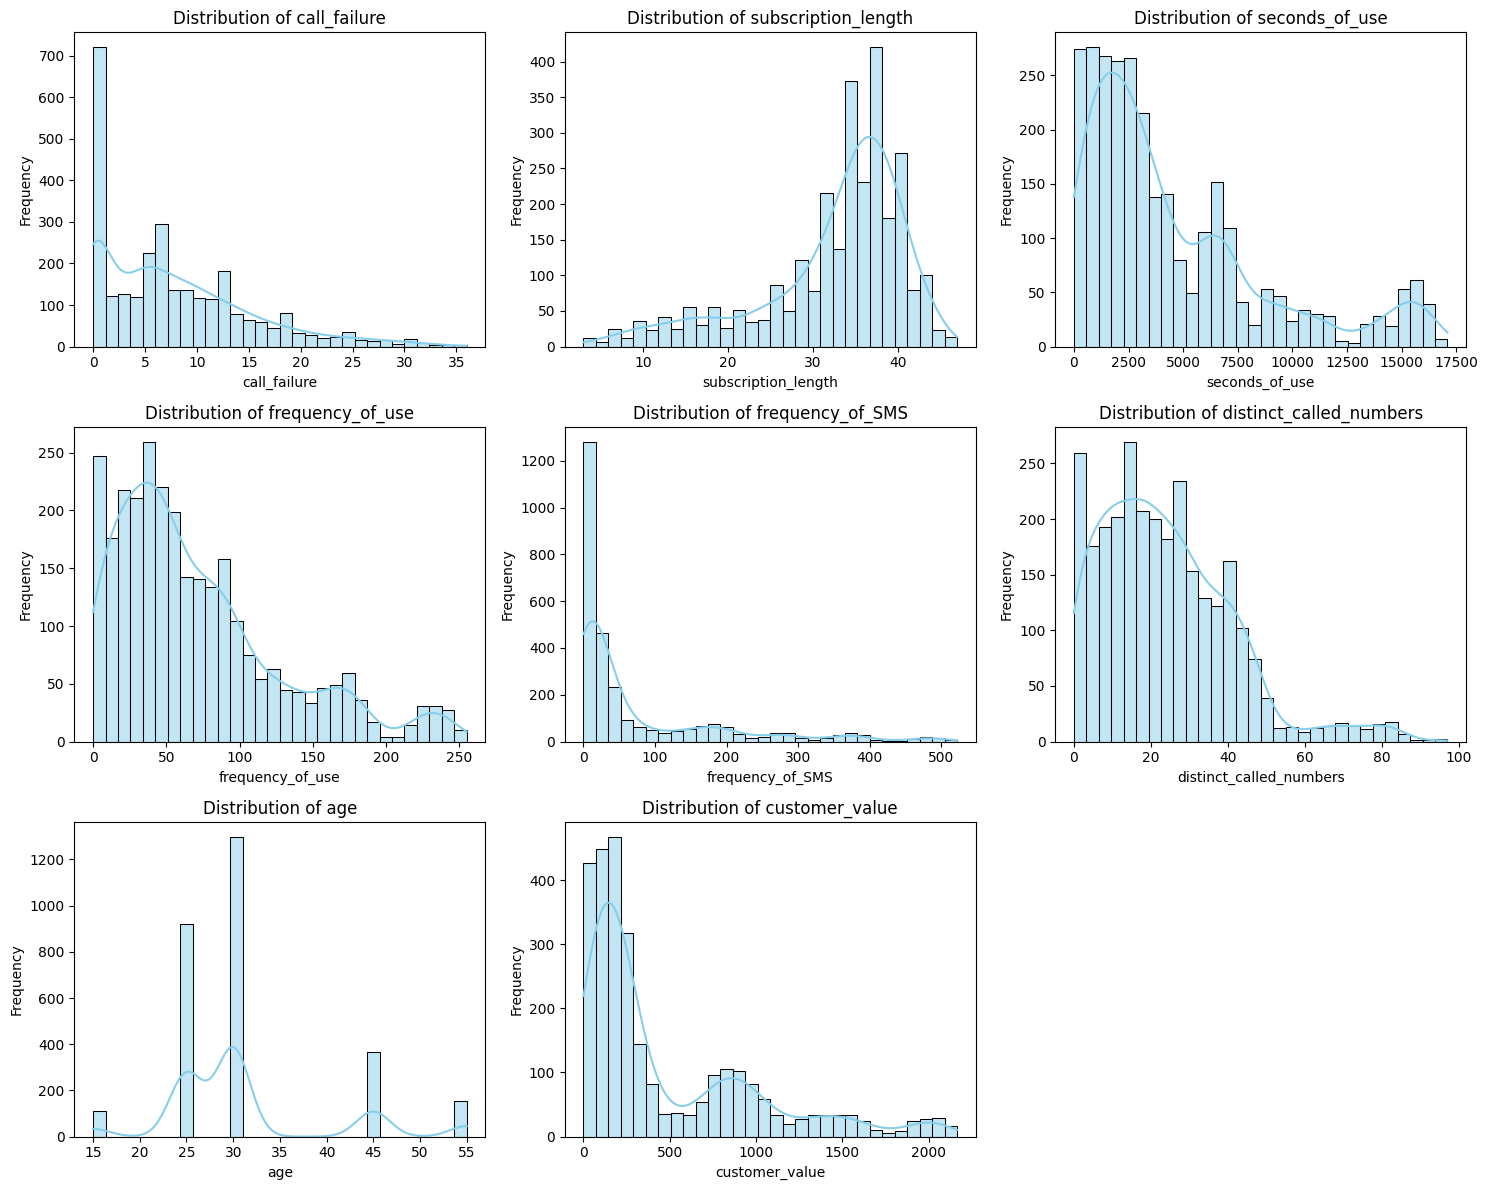

In [728]:
# Define numerical columns
numerical_cols = [
    'call_failure', 'subscription_length', 'seconds_of_use',
    'frequency_of_use', 'frequency_of_SMS', 'distinct_called_numbers',
    'age', 'customer_value'
]

# Set figure size
plt.figure(figsize=(15, 12))  

# Loop through numerical columns and plot histograms
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)   
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')   
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- **Call Failures**: Shows a right-skewed distribution with most users experiencing 0-5 call failures, with the frequency dramatically decreasing after that.
- **Subscription Length**: Appears normally distributed with a peak around 30-40 months, suggesting most customers maintain subscriptions for about 2.5-3.5 years.
- **Seconds of Use**: Right-skewed distribution with most usage falling between 0-5000 seconds, though some users show very high usage up to 17500 seconds.
- **Frequency of Use**: Right-skewed with most users falling in the 0-100 range, indicating varied usage patterns among customers.
- **Frequency of SMS**: Highly right-skewed with a large spike at 0-50, suggesting many customers use SMS sparingly.
- **Distinct Called Numbers**: right-skewed distribution centered around 20-30 different numbers called per customer.
- **Age**: Multi-modal distribution with major peaks around ages 25 and 30, indicating distinct customer age groups.
- **Customer Value**: Right-skewed with most customers concentrated in the lower value range (0-500), with a long tail extending to 2000.

##### **Identifying and Removing Dormant Customer Records with Zero Usage**

In [729]:
# Check active customers with zero `Seconds of Use`, `Frequency of use` and `Customer Value`

# Filter active customers (status = 1)
active_customers = df[df['status'] == 1]

# Check for active customers with zero Seconds of Use AND Frequency of use
zero_usage_customers = active_customers[(active_customers['seconds_of_use'] == 0) &
                                        (active_customers['frequency_of_use'] == 0) & (active_customers['customer_value'] == 0)]

# Counts of potentially invalid data points
zero_usage_count = zero_usage_customers.shape[0]

print(f"Number of customers with zero `Seconds of Use`, `Frequency of use` and `Customer Value` :{zero_usage_count}")

zero_usage_customers.head()

Number of customers with zero `Seconds of Use`, `Frequency of use` and `Customer Value` :26


,call_failure,complains,subscription_length,charge_amount,seconds_of_use,frequency_of_use,frequency_of_SMS,distinct_called_numbers,age_group,tariff_plan,status,age,customer_value,churn
132,0,0,34,0,0,0,0,0,5,1,1,55,0.0,0
232,0,0,32,0,0,0,0,0,5,1,1,55,0.0,0
329,0,0,30,0,0,0,0,0,3,1,1,30,0.0,0
332,0,1,30,0,0,0,0,0,5,1,1,55,0.0,1
432,0,0,33,0,0,0,0,0,5,1,1,55,0.0,0


In [730]:
non_active_customers = df[(df['customer_value'] == 0) & (df['seconds_of_use'] == 0) & (df['frequency_of_use'] == 0) & (df['status'] == 2) ]
print(f"Number of customers with zero `Seconds of Use`, `Frequency of use` and `Customer Value` :{non_active_customers.shape[0]}")
non_active_customers.head()

Number of customers with zero `Seconds of Use`, `Frequency of use` and `Customer Value` :59


,call_failure,complains,subscription_length,charge_amount,seconds_of_use,frequency_of_use,frequency_of_SMS,distinct_called_numbers,age_group,tariff_plan,status,age,customer_value,churn
18,0,0,37,0,0,0,0,0,2,1,2,25,0.0,1
118,0,0,35,0,0,0,0,0,2,1,2,25,0.0,1
128,0,1,34,0,0,0,0,0,3,1,2,30,0.0,1
201,0,0,35,0,0,0,0,0,2,1,2,25,0.0,0
218,0,0,33,0,0,0,0,0,2,1,2,25,0.0,1


- **Zero Usage & Customer Value**

  - All records have zero call duration, zero frequency of use, and zero customer value, indicating no real activity.

- **Long Subscription Length**

  - Despite zero usage, these customers have an average subscription length of 31 months, which is unrealistic for active and non-active users.

- **No Customer Engagement**

    - No call failures, no distinct called numbers, and no SMS activity, confirming these accounts are non-engaged.
    - A few users raised complaints despite having zero usage, which is inconsistent.

In [731]:
# Filter out records where customer_value, seconds_of_use, and frequency_of_use are all zero
df_with_value = df[~((df['customer_value'] == 0) & 
                   (df['seconds_of_use'] == 0) & 
                   (df['frequency_of_use'] == 0) & 
                   (df['status'].isin([1, 2])))]

# Reset index after removal
df_with_value = df_with_value.reset_index(drop=True)

# Display the number of records removed
print(f"Number of records removed: {df.shape[0] - df_with_value.shape[0]}")

# Check the cleaned dataset
df_with_value.head()

Number of records removed: 85


,call_failure,complains,subscription_length,charge_amount,seconds_of_use,frequency_of_use,frequency_of_SMS,distinct_called_numbers,age_group,tariff_plan,status,age,customer_value,churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


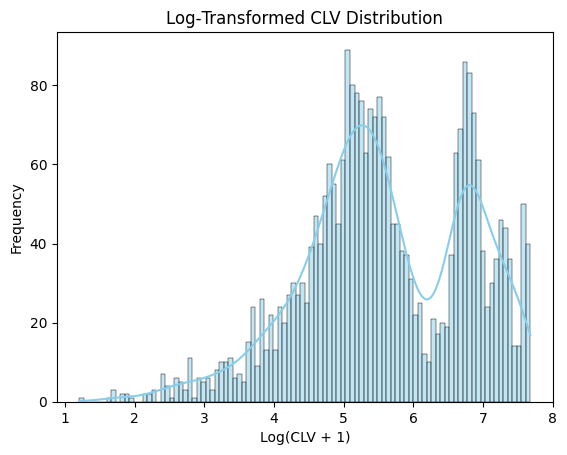

In [732]:
plt.figure()
sns.histplot(np.log1p(df_with_value['customer_value']), bins=100, kde=True, color='skyblue')
plt.title('Log‑Transformed CLV Distribution')
plt.xlabel('Log(CLV + 1)')
plt.ylabel('Frequency')
plt.show()

- CLV showed right-skewed distribution - applied log transformation to achieve more balanced bimodal distribution for regression modeling


##### **Detecting Outliers for Low Usage - High Value & High Usage - Low Value**

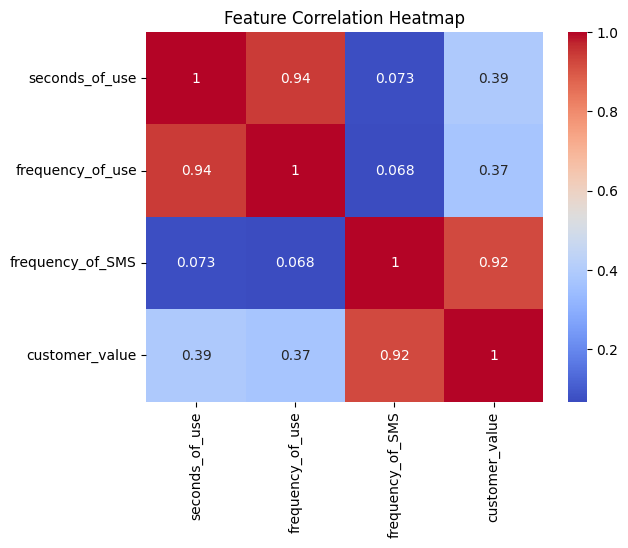

In [733]:
# Correlation heatmap
sns.heatmap(df_with_value[['seconds_of_use', 'frequency_of_use', 'frequency_of_SMS', 'customer_value']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

Since heatmap confirms that frequency_of_use and seconds_of_use have a very high correlation (0.94), 
removing frequency_of_use for further analysis. Also avoids multicollinearity issues in regression models.

In [734]:
df_with_value.drop(columns=['frequency_of_use'], inplace=True)


In [735]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling
numerical_features = ['seconds_of_use', 'frequency_of_SMS', 'customer_value']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply transformation
df_scaled = df_with_value.copy()
df_scaled[numerical_features] = scaler.fit_transform(df_with_value[numerical_features])

# Display scaled dataset
print(df_scaled.head())

   call_failure  complains  subscription_length  charge_amount  \
0             8          0                   38              0   
1             0          0                   39              0   
2            10          0                   37              0   
3            10          0                   38              0   
4             3          0                   38              0   

   seconds_of_use  frequency_of_SMS  distinct_called_numbers  age_group  \
0       -0.072536         -0.628884                       17          3   
1       -1.040543         -0.611184                        4          2   
2       -0.530500          2.504110                       24          3   
3       -0.113627         -0.664285                       35          1   
4       -0.544834         -0.655435                       33          1   

   tariff_plan  status  age  customer_value  churn  
0            1       1   30       -0.566559      0  
1            1       2   25       -0.860762   

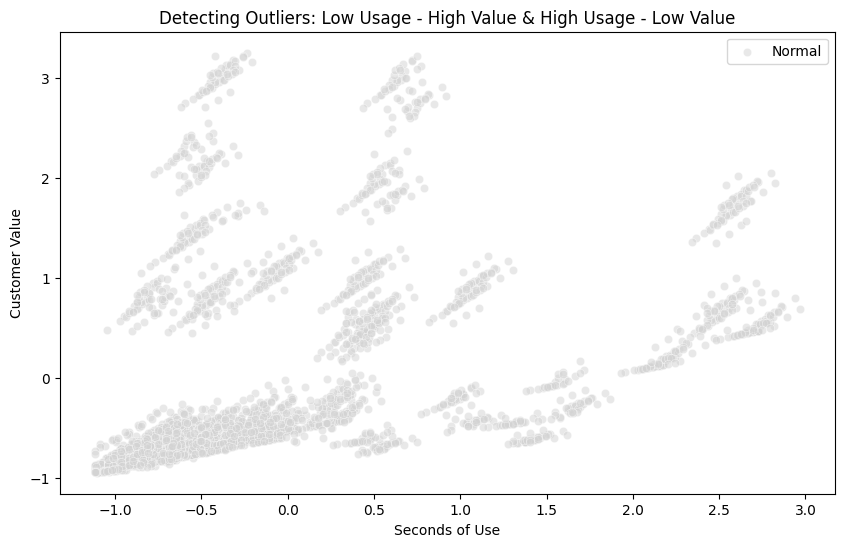

In [736]:
# Define thresholds
low_usage_threshold = df_scaled[['seconds_of_use', 'frequency_of_SMS']].quantile(0.25)  # Lower 25%
high_value_threshold = df_scaled['customer_value'].quantile(0.75)  # Upper 25%
low_value_threshold = df_scaled['customer_value'].quantile(0.25)  # Lower 25%
high_usage_threshold = df_scaled[['seconds_of_use', 'frequency_of_SMS']].quantile(0.75)  # Upper 25%

# Detect Low-Usage & High-Value anomalies
low_usage_high_value = df_scaled[
    (df_scaled['seconds_of_use'] <= low_usage_threshold['seconds_of_use']) & 
    (df_scaled['frequency_of_SMS'] <= low_usage_threshold['frequency_of_SMS']) & 
    (df_scaled['customer_value'] >= high_value_threshold)
]

# Detect High-Usage & Low-Value anomalies
high_usage_low_value = df_scaled[
    (df_scaled['seconds_of_use'] >= high_usage_threshold['seconds_of_use']) & 
    (df_scaled['frequency_of_SMS'] >= high_usage_threshold['frequency_of_SMS']) & 
    (df_scaled['customer_value'] <= low_value_threshold)
]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scaled, x='seconds_of_use', y='customer_value', color='lightgray', alpha=0.5, label='Normal')

# Highlight Anomalies
sns.scatterplot(data=low_usage_high_value, x='seconds_of_use', y='customer_value', color='red', label='Low Usage - High Value', s=80)
sns.scatterplot(data=high_usage_low_value, x='seconds_of_use', y='customer_value', color='blue', label='High Usage - Low Value', s=80)

plt.xlabel('Seconds of Use')
plt.ylabel('Customer Value')
plt.title('Detecting Outliers: Low Usage - High Value & High Usage - Low Value')
plt.legend()
plt.show()


In [737]:
print("Low Usage - High Value Anomalies:", len(low_usage_high_value))
print("High Usage - Low Value Anomalies:", len(high_usage_low_value))

Low Usage - High Value Anomalies: 0
High Usage - Low Value Anomalies: 0


#### **Distribution of Categorical Features**

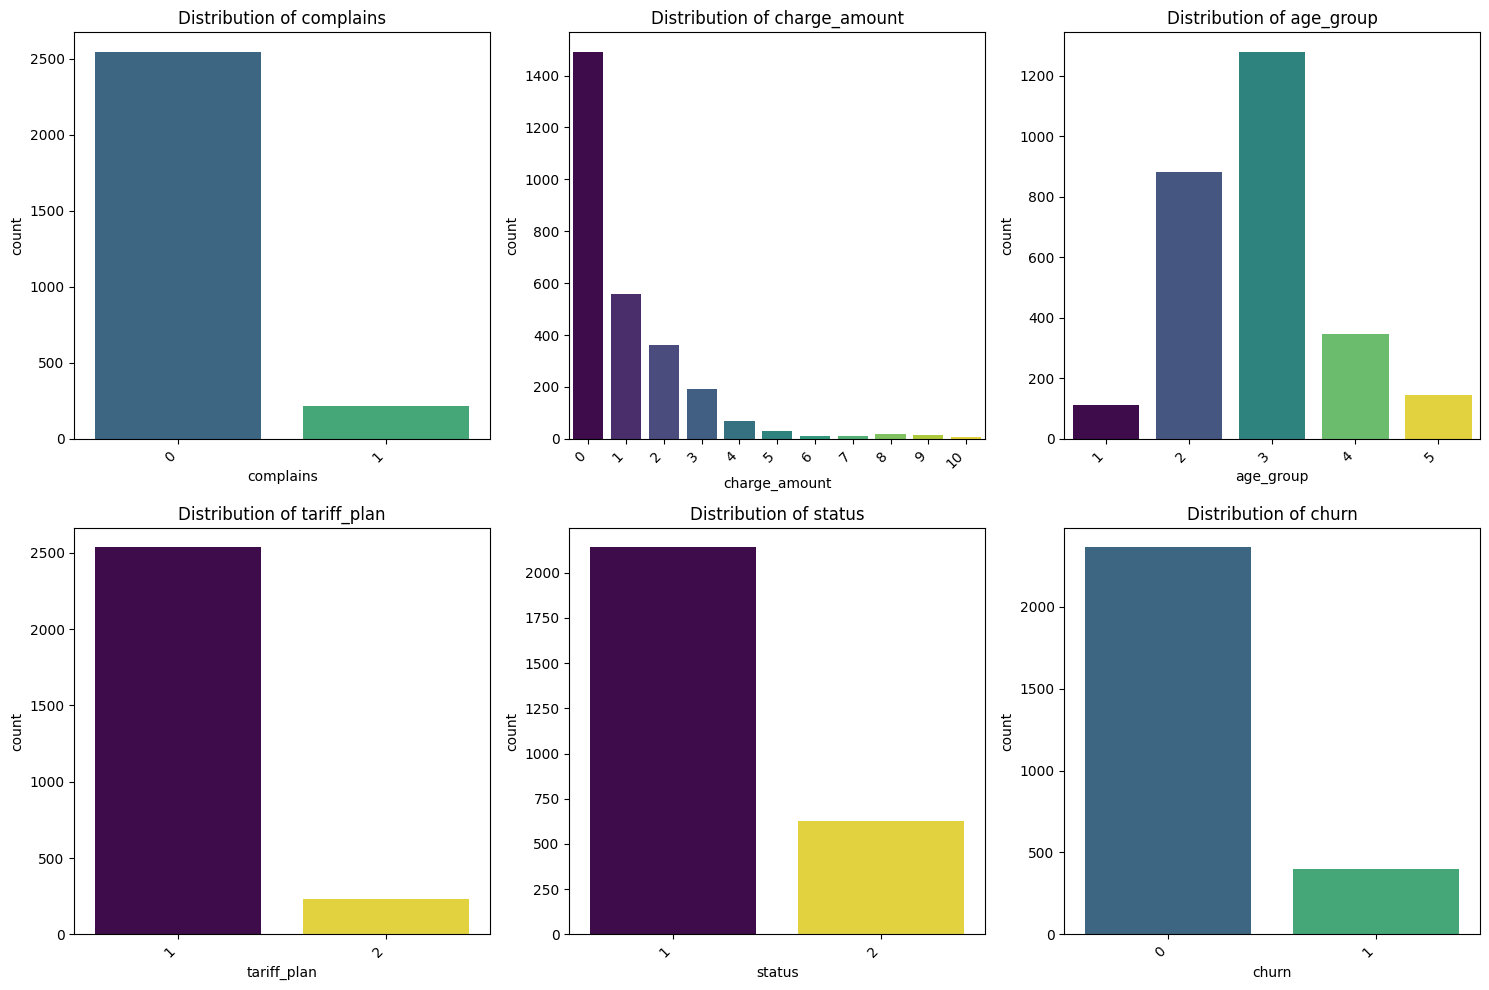

In [738]:
categorical_cols = ['complains', 'charge_amount', 'age_group', 'tariff_plan', 'status', 'churn']

# Set the figure size for better readability
plt.figure(figsize=(15, 10))  # Adjusted size for more columns

# Loop through the categorical columns and create a countplot for each
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df_with_value, x=col, hue=col, palette='viridis', legend=False)  # Corrected line
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

- **Complaints**: Most customers (approximately 2500) have 0 complaints, with a much smaller number (around 250) having 1 complaint, showing excellent customer satisfaction overall.
- **Charge Amount**: Highly right-skewed distribution with most customers having charges between 0-2, and frequency decreasing sharply after that. Very few customers have charges above 5.
- **Age Group**: Shows an uneven distribution across 5 groups:
    - Peak in group 3 (approximately 1300 customers)
    - Second highest in group 2 (about 900 customers)
    - Lower numbers in groups 4 and 5
    - Smallest representation in group 1
- **Tariff Plan**: Binary distribution showing two plans, with Plan 1 being significantly more popular (about 2500 customers) compared to Plan 2 (around 200 customers).
- **Status**: Binary distribution showing two statuses, with Status 1(active) having about 2000 customers and Status 2(non-active) having approximately 700 customers.
- **Churn**: Binary distribution showing churn status, with about 2400 customers in category 0 (likely retained customers) and around 400 in category 1 (likely churned customers), indicating a relatively low churn rate.

#### **Analyzing Relationships with Churn**

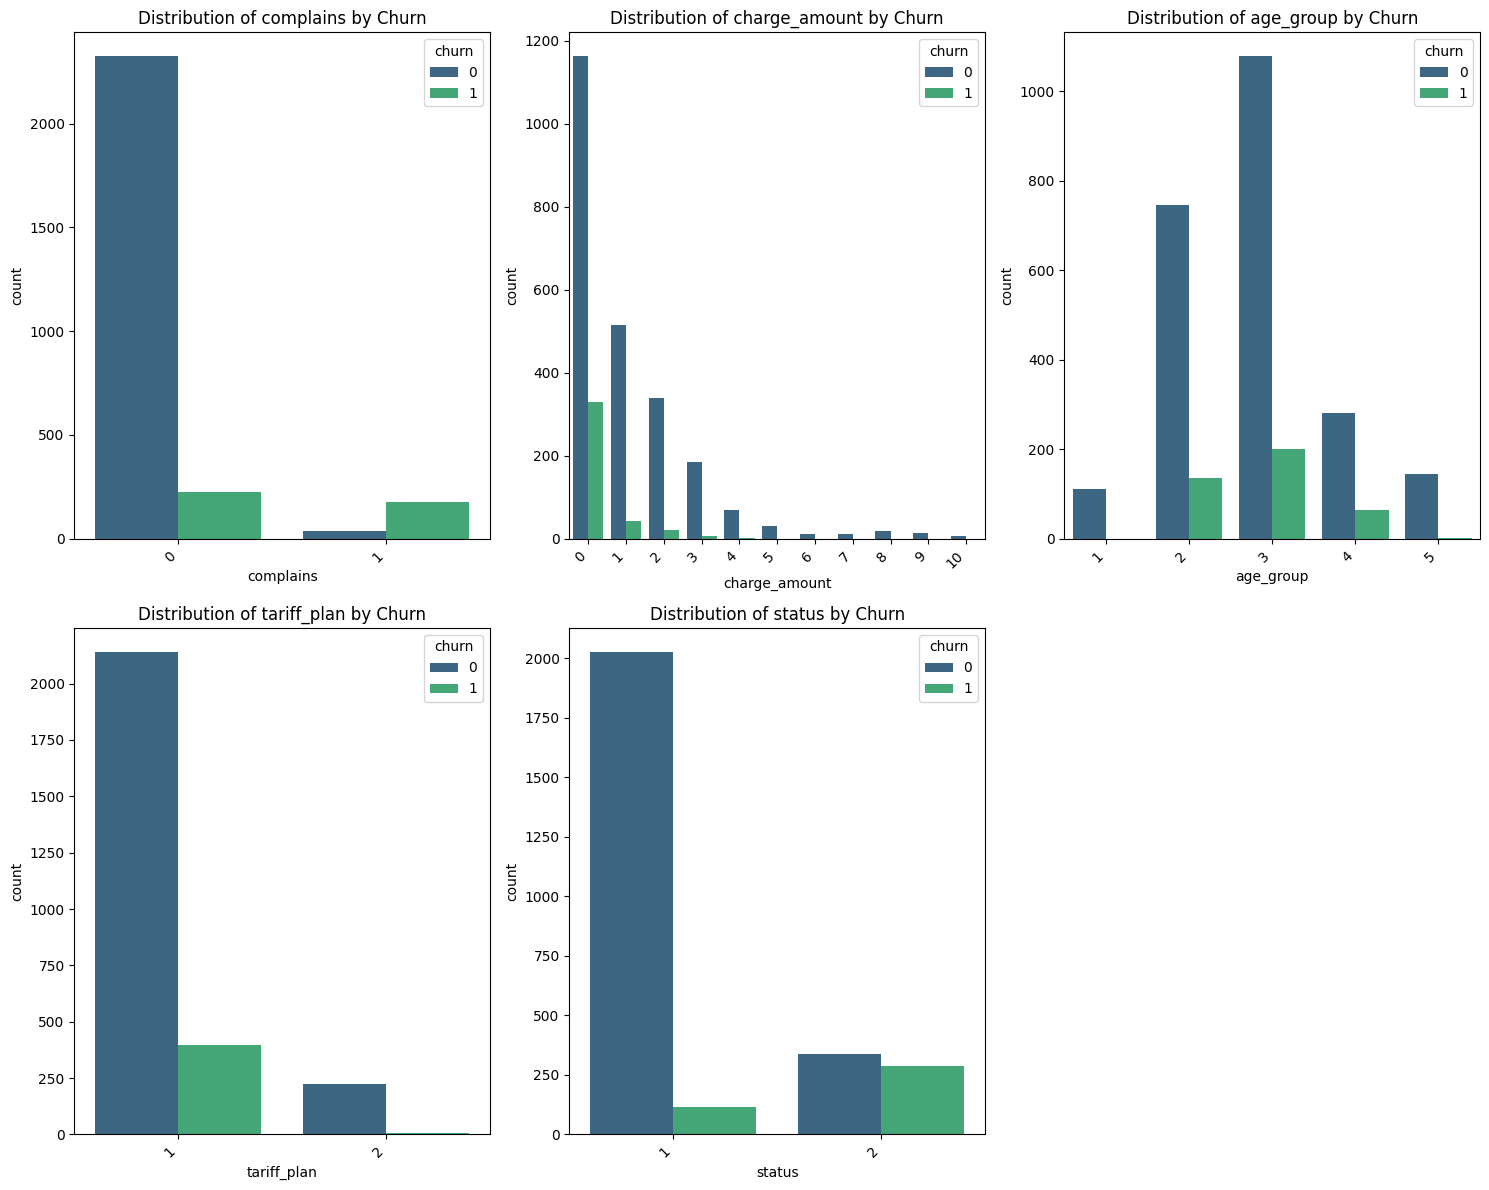

In [739]:
# Remove 'churn' from categorical_cols
categorical_cols.remove('churn')

plt.figure(figsize=(15, 12))

for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df_with_value, x=col, hue='churn', palette='viridis')  # hue='churn' remains as is
    plt.title(f'Distribution of {col} by Churn')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

- **Complaints**: Most retained customers (0) have no complaints, while churned customers (1) show a higher proportion of complaints, suggesting customer service issues may influence churn.
- **Charge Amount**: Churned customers tend to have slightly lower charge amounts overall, particularly in the 0-2 range.
- **Age Groups**: Churn appears more in age groups 2-3, with retained customers having stronger representation across all age segments. Age group 3 shows the highest customer concentration for both churned and retained customers.
- **Tariff Plan**: Plan 1 (Pay as you go) has significantly more customers than Plan 2 (contractual), with both plans showing some churn but Plan 1 having a higher proportion of retained customers.
- **Status**: Status 1 (active) shows a much higher retention rate compared to Status 2(non-active), where the churn rate appears more balanced, suggesting Status 2 customers might be more prone to leaving.

#### **Analyzing Relationships with CLV**

In [741]:
# Compare CLV across tariff plans
display(
    df_with_value.groupby('tariff_plan')['customer_value']
                 .agg(['count','mean','median'])
                 .rename(columns={'mean':'Mean CLV','median':'Median CLV'})
)


,count,Mean CLV,Median CLV
tariff_plan,,,
1,2536,451.628103,221.4975
2,229,910.016048,849.6450


- Customers on Plan 2 (contractual) spend roughly 2× more than Plan 1 — a very strong signal that tariff_plan is predictive of CLV. Plan 2 has far fewer customers (229 vs 2,536), but their higher spending is consistent in both mean and median.

In [714]:
# Compare CLV across status
display(
    df_with_value.groupby('status')['customer_value']
                 .agg(['count','mean','median'])
                 .rename(columns={'mean':'Mean CLV','median':'Median CLV'})
)

,count,Mean CLV,Median CLV
status,,,
1,2140,598.826042,343.185
2,625,115.575704,107.720


- Active customers generate substantially higher CLV.
- Non‑active customers’ CLV is ~80% lower.

In [715]:
# Compare CLV across complains
display(
    df_with_value.groupby('complains')['customer_value']
                 .agg(['count','mean','median'])
                 .rename(columns={'mean':'Mean CLV','median':'Median CLV'})
)

,count,Mean CLV,Median CLV
complains,,,
0,2548,509.878909,253.8025
1,217,251.387488,168.0750


- Complaining customers generate roughly 50% less revenue on average — a strong signal that complaints are associated with lower customer value.

In [716]:
# Compare CLV across age group
display(
    df_with_value.groupby('age_group')['customer_value']
                 .agg(['count','mean','median'])
                 .rename(columns={'mean':'Mean CLV','median':'Median CLV'})
)

,count,Mean CLV,Median CLV
age_group,,,
1,112,342.385804,242.77
2,882,587.589592,321.48
3,1279,546.534167,264.92
4,347,224.363184,156.80
5,145,139.655793,150.78


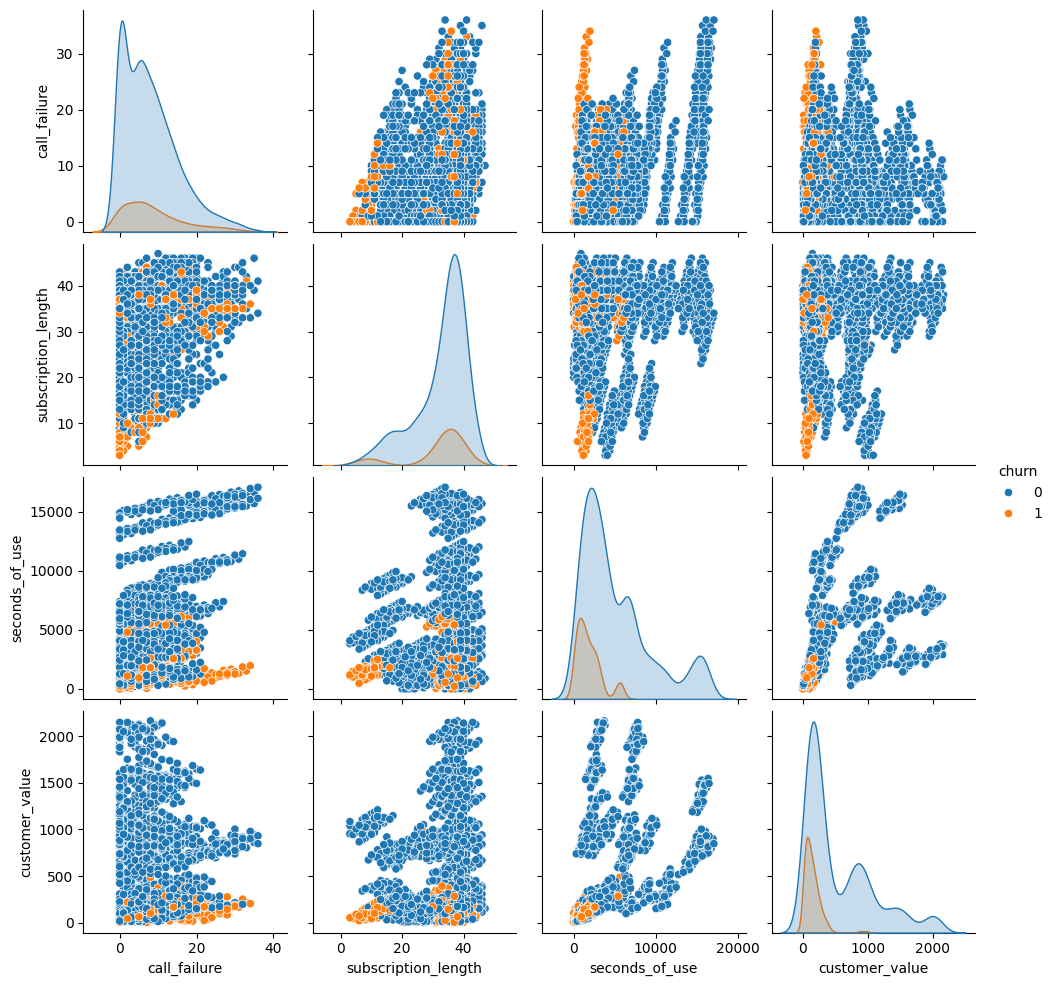

In [717]:
# Pairplot to analyze numerical features with churn
sns.pairplot(df_with_value, vars=['call_failure', 'subscription_length', 'seconds_of_use', 'customer_value'], hue='churn')
plt.show()

**Relationships:**

- Customer Value vs Call Failures: Higher call failures tend to correlate with lower customer value
- Seconds of Use vs Customer Value : Strong positive relationship: higher call volume → higher CLV. 
- Seconds of Use vs Call Failures: More active users (higher seconds of use) tend to experience more call failures, likely due to higher usage volume
- Customer Value vs Subscription Length: Shows a positive correlation, indicating longer-term customers tend to have higher value

**Churn Patterns:**

- Churned customers (orange dots) tend to cluster more in the lower ranges of seconds_of_use and customer_value
- The distribution of churned vs retained customers appears more mixed for call_failures and subscription_length

#### **Churn Imbalance**

Churn distribution (%):
 churn
0    85.461121
1    14.538879
Name: proportion, dtype: float64


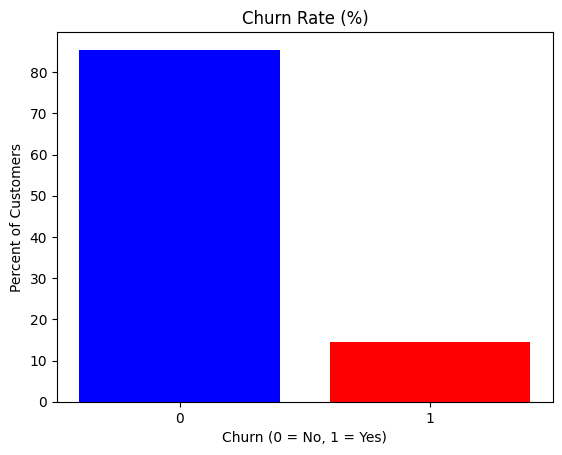

In [718]:
churn_pct = df_with_value['churn'].value_counts(normalize=True).mul(100)
print("Churn distribution (%):\n", churn_pct)

# Assign colors: churn=0 → blue, churn=1 → red
colors = ['blue' if idx == 0 else 'red' for idx in churn_pct.index]

plt.figure()
plt.bar(churn_pct.index.astype(str), churn_pct.values, color=colors)
plt.title('Churn Rate (%)')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Percent of Customers')
plt.show()

#### **Correlation Heatmap**

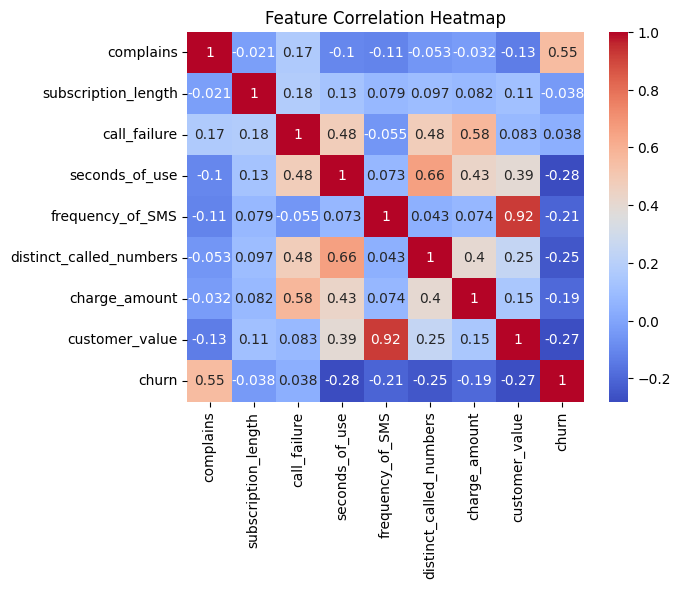

In [689]:
selected = [
    'complains',
    'subscription_length',
    'call_failure',
    'seconds_of_use',
    'frequency_of_SMS',
    'distinct_called_numbers',
    'charge_amount',
    'customer_value',
    'churn'
]

sns.heatmap(df_with_value[selected].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

**For Customer Value Regression:**

- Strong positive correlation between frequency of SMS and customer value (0.92)
- Moderate positive correlations with seconds of use (0.39).

**For Churn Classification:**

- Moderate positive correlation with complaints (0.55) - higher complaints lead to higher churn
- Moderate positive correlation with status (0.49)
- Negative correlations with seconds of use (-0.28) and frequency of sms (-0.21) - higher usage associated with lower churn

**Highly Correlated Features to check for multicollinearity:**

- Seconds of use and distinct called numbers (0.66)

##### **Multicollinearity: Correlation Matrix & VIF**


<Figure size 640x480 with 0 Axes>

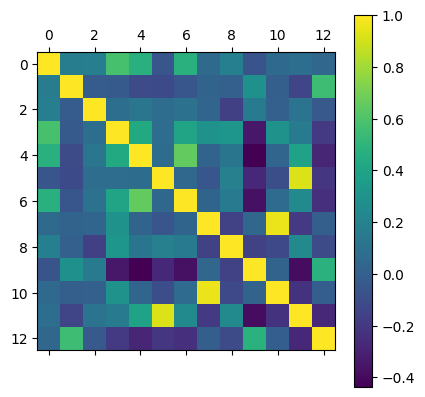

,feature,VIF
0,seconds_of_use,4.319781
1,frequency_of_SMS,1.317823
2,call_failure,3.567001
3,charge_amount,2.223435
4,distinct_called_numbers,4.815012


In [690]:
corr = df_with_value.select_dtypes("number").corr()
plt.figure(); 
plt.matshow(corr); 
plt.colorbar(); 
plt.show()

from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_with_value[['seconds_of_use',
        'frequency_of_SMS',
        'call_failure',
        'charge_amount',
        'distinct_called_numbers'
        ]]
vif = pd.DataFrame({"feature": X.columns, "VIF":[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]})
display(vif)

#### **Feature Selection**

| Feature                  | Regression | Classification | Justification                                              |
|--------------------------|------------|----------------|------------------------------------------------------------|
| call_failure             | Keep       | Keep           | Moderate predictive signal, acceptable VIF                 |
| seconds_of_use           | Keep       | Keep           | Strong usage indicator                                     |
| frequency_of_SMS         | Keep       | Keep           | Very strong CLV driver                                     |
| distinct_called_numbers  | Keep       | Keep           | Unique usage signal, moderate VIF                          |
| charge_amount            | Keep       | Keep           | Small but consistent CLV effect                            |
| complains                | Keep       | Keep           | Significant negative CLV & strong churn predictor          |
| tariff_plan              | Keep       | Keep           | ~2× difference in CLV between plans                        |
| status                   | Keep       | Keep           | ~5× difference in CLV, strong churn predictor              |
| subscription_length      | Drop       | Keep           | Redundant for CLV, but predictive of churn                 |
| age_group                | Keep       | Keep           | Encodes age with more granularity than raw five ages       |


In [691]:
df_with_value.drop(columns=['subscription_length', 'age'], inplace=True)

In [692]:
df_with_value.shape

(2765, 11)

#####  **Write Output**

In [693]:
df_with_value.to_csv('../resources/data/output/customer_churn_prepared.csv', index=False)